<a href="https://colab.research.google.com/github/drihn/EXERCISE_DEEPLEARNING/blob/main/Exercize_4_Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!wget https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True


--2025-05-21 12:03:42--  https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-05-21 12:03:42--  https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-05-21 12:03:42--  https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip
Re

In [14]:
!unzip catsanddogs.zip?raw=True


Archive:  catsanddogs.zip?raw=True
   creating: catsanddogs/
   creating: catsanddogs/test/
   creating: catsanddogs/train/
   creating: catsanddogs/validation/
   creating: catsanddogs/test/cat/
   creating: catsanddogs/test/dog/
   creating: catsanddogs/train/cat/
  inflating: catsanddogs/train/.DS_Store  
  inflating: __MACOSX/catsanddogs/train/._.DS_Store  
   creating: catsanddogs/train/dog/
   creating: catsanddogs/validation/cat/
  inflating: catsanddogs/validation/.DS_Store  
  inflating: __MACOSX/catsanddogs/validation/._.DS_Store  
   creating: catsanddogs/validation/dog/
  inflating: catsanddogs/test/cat/cat.198.jpg  
  inflating: __MACOSX/catsanddogs/test/cat/._cat.198.jpg  
  inflating: catsanddogs/test/cat/cat.167.jpg  
  inflating: __MACOSX/catsanddogs/test/cat/._cat.167.jpg  
  inflating: catsanddogs/test/cat/cat.173.jpg  
  inflating: __MACOSX/catsanddogs/test/cat/._cat.173.jpg  
  inflating: catsanddogs/test/cat/cat.172.jpg  
  inflating: __MACOSX/catsanddogs/test/cat

## Import Libraries

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
img_height, img_width = 32, 32
batch_size = 20

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 202 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


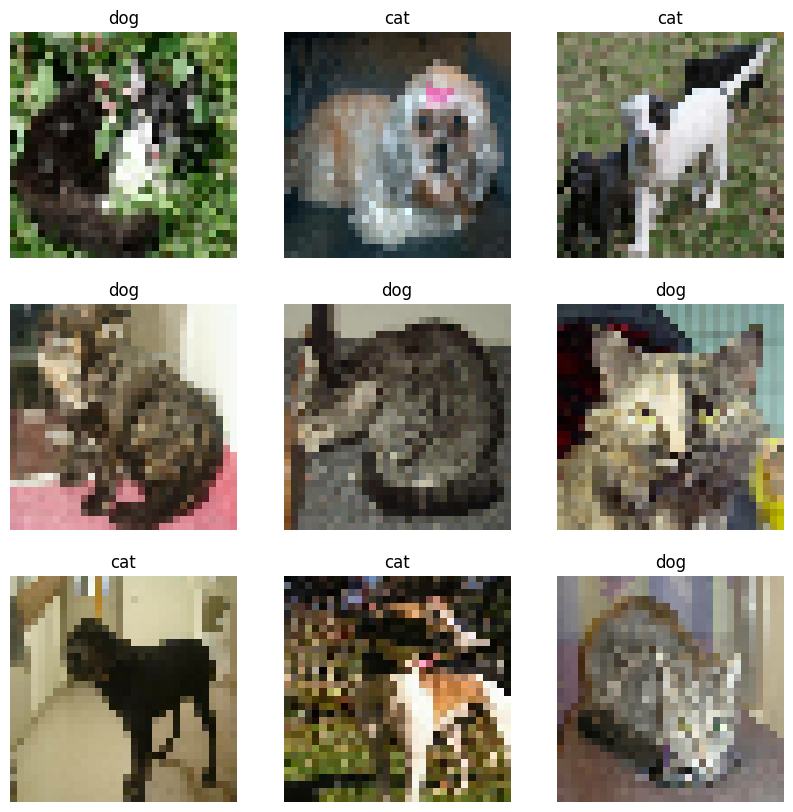

In [18]:
class_names = ["dog", "cat"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
model = tf.keras.Sequential()


In [20]:
model.add(tf.keras.layers.Rescaling(1./255))


In [21]:
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

In [22]:
model.add(tf.keras.layers.Flatten())


In [23]:

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(3))


In [24]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [26]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.4884 - loss: 0.9826 - val_accuracy: 0.5350 - val_loss: 0.7007
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5066 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.7374
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5017 - loss: 0.7756 - val_accuracy: 0.5000 - val_loss: 0.7229
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5403 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.7003
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4920 - loss: 0.7076 - val_accuracy: 0.5200 - val_loss: 0.6914
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5852 - loss: 0.6831 - val_accuracy: 0.5050 - val_loss: 0.6921
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5656 - loss: 0.6799 - val_accuracy: 0.5300 - val_loss: 0.6932
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5646 - loss: 0.6901 - val_accuracy: 0.5050 - v

In [27]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4911 - loss: 0.6939


[0.6897830963134766, 0.5299999713897705]

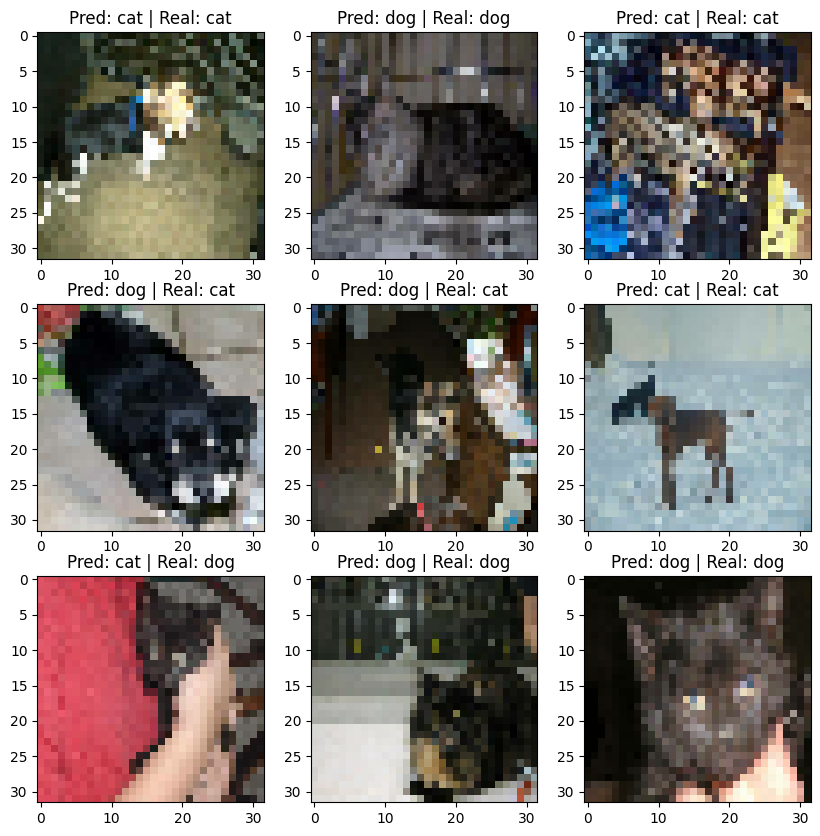

In [28]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])